                Time                      Azim    Elev    Distance   Radial Velocity
AOS     2023-06-23T16:39:50.458737 UTC  167.21    0.00    2331.09   -4579.52
        2023-06-23T16:40:12.633895 UTC  164.07    0.91    2232.57   -4299.36
        2023-06-23T16:40:42.633895 UTC  159.36    2.10    2110.07   -3853.97
        2023-06-23T16:41:12.633895 UTC  154.09    3.22    2002.18   -3324.26
        2023-06-23T16:41:42.633895 UTC  148.26    4.21    1911.51   -2705.21
        2023-06-23T16:42:12.633895 UTC  141.89    5.03    1840.74   -1998.99
        2023-06-23T16:42:42.633895 UTC  135.08    5.62    1792.33   -1218.04
        2023-06-23T16:43:12.633895 UTC  127.98    5.92    1768.17    -386.37
MAX     2023-06-23T16:43:26.994074 UTC  124.53    5.96    1765.54      20.15
        2023-06-23T16:43:42.633895 UTC  120.78    5.92    1769.32     462.67
        2023-06-23T16:44:12.633895 UTC  113.69    5.60    1795.73    1292.25
        2023-06-23T16:44:42.633895 UTC  106.92    5.00    1846.33   

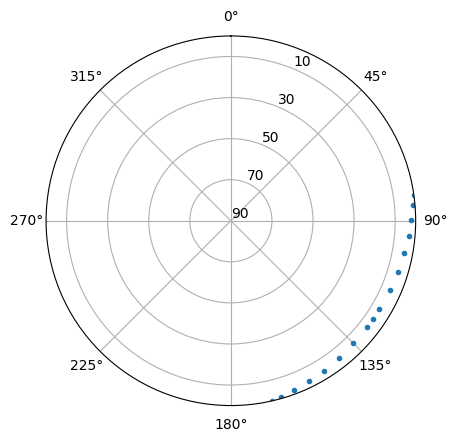

2023-06-23T09:30:15.852212 UTC
BPL


In [ ]:

import sys
import numpy as np
import matplotlib.pyplot as plt

from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

# Station definition
station = create_station('BPL', ( 37.8059,144.9514, 0))
azims, elevs = [], []

print("                Time                      Azim    Elev    Distance   Radial Velocity")
print("====================================================================================")

for orb in station.visibility(tle, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
    elev = np.degrees(orb.phi)
    # Radians are counterclockwise and azimuth is clockwise
    azim = np.degrees(-orb.theta) % 360

    # Archive for plotting
    azims.append(azim)
    # Matplotlib actually force 0 to be at the center of the polar plot,
    # so we trick it by inverting the values
    elevs.append(90 - elev)

    r = orb.r / 1000.
    print("{event:7} {orb.date} {azim:7.2f} {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))

    if orb.event and orb.event.info.startswith("LOS"):
        # We stop at the end of the first pass
        print()
        break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)

if "no-display" not in sys.argv:
    plt.show()
    print(Date.now())
    print(station)
     

A frame with the name 'BPL' is already registered. Overriding


AOS      2023-06-23T06:15:44.719741 UTC   339.95     0.00    2330.61   -6012.26
MAX      2023-06-23T06:20:31.818163 UTC    43.18    15.74    1170.66      -5.46
LOS      2023-06-23T06:25:17.974165 UTC   106.28    -0.00    2326.61    6031.57


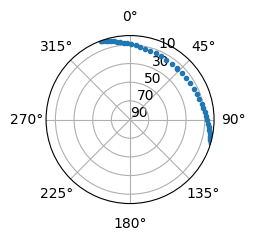

AOS      2023-06-23T07:52:05.739199 UTC   304.35     0.00    2329.41   -6526.86
MAX      2023-06-23T07:57:09.154692 UTC   233.86    24.47     878.23      -6.11
LOS      2023-06-23T08:02:12.292014 UTC   163.12    -0.00    2323.76    6508.28


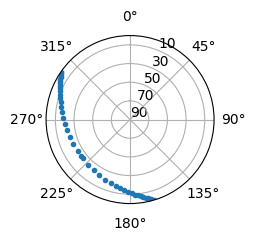

AOS      2023-06-23T21:13:48.862111 UTC   205.55     0.00    2331.91   -6764.31
MAX      2023-06-23T21:19:04.779891 UTC   127.45    38.54     634.71       2.49
LOS      2023-06-23T21:24:20.866488 UTC    49.59    -0.00    2335.14    6775.48


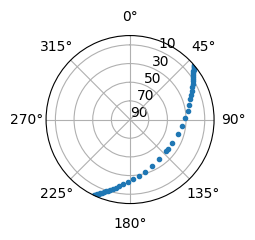

AOS      2023-06-23T22:51:24.068373 UTC   262.73     0.00    2334.42   -5550.88
MAX      2023-06-23T22:55:50.658639 UTC   318.78    11.18    1405.13       0.45
LOS      2023-06-23T23:00:17.815910 UTC    14.97    -0.00    2334.82    5529.81


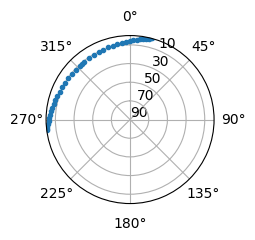

In [3]:
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
 
import sys
import numpy as np
import matplotlib.pyplot as plt

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()
azims, elevs = [], []
#print(repr(tle))

station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 


# checkAOS = StationSignalListener(station,0).info(tle)
# print(checkAOS)
# check = StationMaskListener(station=station).check(tle)
# print(check)
 

for orb in station.visibility(tle, start=Date(2023, 6, 23, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        print("{event:7}  {orb.date}  {azim:7.2f}  {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
        plt.figure()
        ax = plt.subplot(223, projection='polar')   
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        plt.plot(np.radians(azims), elevs, '.')
        ax.set_yticks(range(0, 90, 20))
        ax.set_yticklabels(map(str, range(90, 0, -20)))
        ax.set_rmax(90)   
        
        if "no-display" not in sys.argv:
            plt.show()
        
        azims.clear()
        elevs.clear()
        

        
        

# plt.figure()
# ax = plt.subplot(111, projection='polar')
# ax.set_theta_direction(-1)
# ax.set_theta_zero_location('N')
# plt.plot(np.radians(azims), elevs, '.')
# ax.set_yticks(range(0, 90, 20))
# ax.set_yticklabels(map(str, range(90, 0, -20)))
# ax.set_rmax(90)

# if "no-display" not in sys.argv:
#     plt.show()
 

In [32]:
from beyond.dates import Date, timedelta
print(Date.now())
print(timedelta(hours=24))
print(Date(2023, 6, 18, 00, 00, 00) )

2023-06-15T20:10:53.416492 UTC
1 day, 0:00:00
2023-06-18T00:00:00 UTC


In [19]:
from datetime import datetime
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal

local_timezone = tzlocal.get_localzone() # get pytz tzinfo
utc_time = datetime.strptime("2011-01-21 02:37:21", "%Y-%m-%d %H:%M:%S")
local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)

print(utc_time , local_time)

2011-01-21 02:37:21 2011-01-21 08:07:21+05:30


In [34]:
 
import sys
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
 
local_timezone = tzlocal.get_localzone() 

 
station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 
for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=2), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    if orb.event and orb.event.info.startswith('AOS') :
        
        print("         Date         Time          Azim      Elev      Distance   Radial Velocity")
        print("==================================================================================") 

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
        
        str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
        utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
        local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
          
        _date = local_time.strftime("%m/%d/%Y")
        _time = local_time.strftime("%H:%M:%S")
          
        
        print("{event:7} | {date} | {time}  | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
        orb=orb, r=r, date = _date , time = _time,azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
       
        pass

        

A frame with the name 'BPL' is already registered. Overriding


         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 06:02:27  |  239.12 |    0.00 |    2330.67 |   -6606.63
MAX     | 06/18/2023 | 06:07:38  |  313.69 |   29.19 |     777.05 |       2.31
LOS     | 06/18/2023 | 06:12:49  |   28.45 |   -0.00 |    2333.24 |    6590.36


In [5]:
import sys
import json
import pandas as pd
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from utils import timeconverter , plotPolar

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23173.75521419  .00016405  00000+0  29181-3 0  9999
2 25544  51.6433 300.9297 0004626  67.7219  92.6557 15.50286364402655""").orbit()
 
azims = []
elevs = []

station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
def predictNow(satData, station, plot):
    
    azims = []
    elevs = []

    for orb in station.visibility(satData, start=Date.now(), stop=timedelta(hours=12), step=timedelta(seconds=60),
                                events=True):
        
        elev = np.degrees(orb.phi)
        azim = np.degrees(-orb.theta) % 360

        _datetime = timeconverter(orb.date.strftime("%m/%d/%Y  %H:%M:%S"))
        _date = _datetime.strftime("%m/%d/%Y")
        _time = _datetime.strftime("%H:%M:%S")
        
        azims.append(azim)
        elevs.append(90 - elev)
        if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith(
                'LOS') or orb.event and orb.event.info.startswith('MAX'):
            print("{event:7}  {date} {time}  {azim:7.2f}  {elev:7.2f}  ".format(
                orb=orb, date=_date, time=_time, azim=azim, elev=elev,
                event=orb.event.info if orb.event is not None else ""
            ))
        if orb.event and orb.event.info.startswith('LOS'):
            print("\n")
    if plot == True:
        plotPolar(azims, elevs)
    
predictNow(tle , station , 0)


A frame with the name 'BPL' is already registered. Overriding


AOS      06/24/2023 02:48:44   208.34     0.00  
MAX      06/24/2023 02:54:02   127.89    45.40  
LOS      06/24/2023 02:59:21    47.69    -0.00  


